# Neural Network

## What's a Neural Network

### Neural Network Use Cases

**Neural networks** are incredibly popular and powerful machine learning models. _They often perform well in cases where we have a lot of features as they automatically do feature engineering without requiring domain knowledge to restructure the features._

In this notebook we will be using **image data**. Since each pixel in the image is a feature, we can have a really large feature set. Neural networks are also commonly used in test data and voice recognition as they also have a large feature set.

### Bionics Reference

A more accurate term for neural networks in computer is **Artificial Neural Networks (ANN)**. They were inspired by how biological neural networks work in human brains.

A brain's neural network is made up of around 86 billion **neurons**. The neurons are connected by **synapses**. There are about 100 trillion synapses in the human brain. The neurons send signals to each other through synapses.

## A Neuron

### What's a Neuron?

An **artificial neuron** (often called a **node**) is a simple object that can take input, so some calculations with the input, and produce an output. Neurons can take any number of inputs and can also produce any number of outputs. _A neuron by itself does not have much predictive power, but when we build a network of them, we can have a powerful model._

They are usually represented as follows where $x_1$ and $x_2$ are the inputs. Inside the neuron some computation is done to produce the output $y_1$.

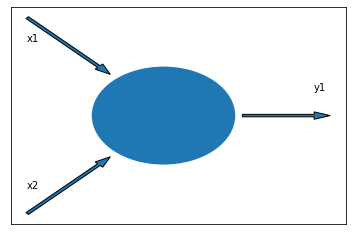

In [1]:
import matplotlib.pyplot as plt

# Draw the model
plt.arrow(-20, 20, 10, -10, width=0.5)
plt.annotate("x1", (-20, 15))
plt.arrow(-20, -20, 10, 10, width=0.5)
plt.annotate("x2", (-20, -15))
plt.gca().add_patch(plt.Circle((-1, 0), 10))
plt.arrow(10, 0, 10, 0, width=0.5)
plt.annotate("y1", (20, 5))

# Hide axis value ticks and labels
plt.xticks(())
plt.yticks(())

plt.show()

### Neuron Computations

Inside the neuron in the previous example, the computation in done using the following equation (similar to that in a logistic regression).

$$
y1 = w_1 x_1 + w_2 x_2 + b
$$

We refer to $w_1$ and $w_2$ as **weights**, and $b$ as **bias**. Together they are the **parameters**. The resulting value could be any real number. We plug it in an **activation function** to condense it into a fixed range (usually between 0 and 1). A commonly used activation function is the **sigmoid** function. The function is defined as follows.

$$
\mathrm{sigmoid}(x) = \frac{1}{1+e^{-x}}
$$

<center><img src=res/sigmoid.png></center>

So, a general formula for $y$ on $n$ inputs $(x_1, x_2, ..., x_n)$ with activation function $f = \text{sigmoid}$ is as follows.

$$
y = f(\Sigma_{i=1}^{n}{w_ix_i} + b)
$$

### Activation Functions

There are three commonly used activation functions: sigmoid (from the previous part), **tanh** and **ReLU**.

Tanh has a similar form to sigmoid, though ranges from $-1$ to $1$ instead of $0$ to $1$. Tanh is read the hyperbolic tan function and is defined as follows.

$$
f(x) = \mathrm{tanh}(x)
     = \frac{\mathrm{sinh}(x)}{\mathrm{cosh}(x)}
     = \frac{e^x-e^{-x}}{e^x+e^{-x}}
$$

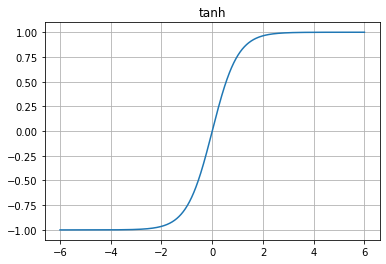

In [2]:
import numpy as np

x = np.linspace(-6, 6, 1000)
y_tanh = np.tanh(x)
plt.plot(x, y_tanh)
plt.title("tanh")
plt.grid()
plt.show()

ReLU stands for **Rectified Linear Unit**. It is the identity function for positive numbers and sends negative numbers to 0. Below is the equation and graph.

$$
\mathrm{ReLU}(x) = \cases{
    0 & if x ≤ 0 \\
    x & if x > 0
}
$$

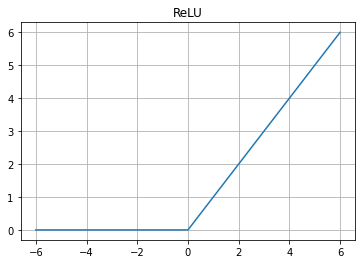

In [3]:
y_relu = x * (x > 0)
plt.plot(x, y_relu)
plt.title("ReLU")
plt.grid()
plt.show()

_The choice of activation function depends on the specifics of the data. In practice, we figure out which to use by comparing their performances._

## Neural Network

### Multi-Layer Perceptron

To create a neural network we combine neurons together so that the outputs of some neurons are inputs of other neurons. We will be working with **feed forward** neural networks which means that the neurons only send signals in one direction. In particular, we will be working with what is called a **multi-layer perceptron (MLP)**. The neural network has multiple layers as depicted below.

<center>
    <img src=https://api.sololearn.com/DownloadFile?id=3956 alt="multi-layer perceptron"><br>
    <label>Source: Sololearn</label>
</center>


A multi-layer perceptron will always have one **input layer**, with one neuron (or node) per input. It will have one **output layer**, with a node for each output. It can have any number of **hidden layers** and each hidden layer can have any number of nodes. In the neural network above, there are two inputs and one output.

_A **single-layer perceptron** is one without any hidden layers. They are rarely used._

### Example Neural Network

A simple example of a neural network would be as follows. It has two inputs, a single hidden layer with two nodes, and one output. The weight and bias are written in the nodes. All nodes use the sigmoid activation function.

<center>
    <img src=https://api.sololearn.com/DownloadFile?id=3957>
    <br>
    <label>Source: Sololearn</label>
</center>

The calculation for the input $(3, 2)$ would be as follows. We denote the inputs $x_1$ and $x_2$, and the values of the nodes in the hidden layer $h_1$ and $h_2$.

$$
\begin{align*}
h_1 &= f(0 \times x_1 + 1 \times x_2 + 0) \\
    &= f(0 \times 3 + 1 \times 2 + 0) \\
    &= f(2) \\
    &= \frac{1}{1 + e^{-2}} \\
    &\approx 0.8808 \\
\\
h_2 &= f(1 \times x_1 + 2 \times x_2 + (-1)) \\
    &= f(1 \times 3 + 2 \times 2 - 1) \\
    &= f(6) \\
    &= \frac{1}{1 + e^{-6}} \\
    &\approx 0.9975
\end{align*}
$$

Then we calculate the output, denoted $y_1$.

$$
\begin{align*}
y_1 &= f(1 \times h_1 + 2 \times h_2 + 2) \\
    &= f(1 \times 0.8808 + 2 \times 0.9975 - 1) \\
    &= f(1.8833) \\
    &= \frac{1}{1 + e^{-1.8833}} \\
    &\approx 0.8680
\end{align*}
$$

A generalized formula for calculating each neuron using linear algebra is as follows.

$$
\begin{equation}
    \begin{bmatrix}
        a_0^{(l+1)} \\
        a_1^{(l+1)} \\
        \vdots \\
        a_k^{(l+1)}
    \end{bmatrix}
    =
    \sigma
    \left(
        \begin{bmatrix}
            w_{0,0} & w_{0,1} & \ldots & w_{0,n} \\
            w_{1,0} & w_{1,1} & \ldots & w_{1,n} \\
            \vdots  & \vdots  & \ddots & \vdots \\
            w_{k,0} & w_{k,1} & \ldots & w_{k,n} \\
        \end{bmatrix}
        \begin{bmatrix}
            a_0^{(l)} \\
            a_1^{(l)} \\
            \vdots \\
            a_n^{(l)}
        \end{bmatrix}
        +
        \begin{bmatrix}
            b_0 \\
            b_1 \\
            \vdots \\
            b_k
        \end{bmatrix}
    \right)
\end{equation}
$$

This can be more compactly written with just symbols.

$$
\mathbf{a}^{(l+1)} = \sigma(W_l\mathbf{a}^{(l)} + \mathbf{b}_l)
$$

_To change how the neural network performs, we find the optimal weights and bias values._

### Multiple Targets

A nice benefit of an MLP classifier is that it easily extends to problems that have more than 2 target values. In the previous notebooks, we have dealt with only binary predictions ($0$ or $1$). _We can user any classifier for multi-class problem, but neural networks generalize naturally._ Simply add more nodes to the output layer to choose between more possible outputs. The classifier chooses the output with the highest value.

## Training the Neural Network

### Loss

In order to train a neural network, we need to define a **loss function**. This is a measure of how far off our neural network is from being perfect. When we train the neural network, we are optimizing a loss function.

In this notebook, we will use **cross entropy** as our loss function. This is the same as the likelihood we used in logistic regression but called differently. It is defined as follows.

$$
\text{cross entropy} = \cases{
    p     & if y = 1 \\
    1 - p & if y = 0
}
$$

We multiply the cross entropy values for all the data points.

<table style="text-align:right">
    <tr>
        <th>Target</th>
        <th>Model 1 Prediction</th>
        <th>Model 2 Prediction</th>
    </tr>
    <tr>
        <td>1</td>
        <td>0.6</td>
        <td>0.5</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0.8</td>
        <td>0.9</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0.3</td>
        <td>0.1</td>
    </tr>
    <tr>
        <td>0</td>
        <td>0.4</td>
        <td>0.5</td>
    </tr>
</table>

The cross entropy for model 1 is as follows.

$$
0.6 \times 0.8 \times (1 - 0.3) \times (1 - 0.4) = 0.2016
$$

The cross entropy for model 2 is as follows.

$$
0.5 \times 0.9 \times (1 - 0.1) \times (1 - 0.5) = 0.2016
$$

The higher the entropy, the better the model. Thus, model 2 is a better model than model 1.

### Backpropagation

A neural network has a lot of parameters that we can control. The neural network works backwards from the output node iteratively updating the parameters of the nodes using **gradient descent**. This process is called **backpropagation**. The goal is to minimize the **cost function** (or the average of the loss function of all outputs).

## Neural Networks in Scikit-learn

### Creating Artificial Dataset

Sometimes in order to test models, it is helpful to create an **artificial dataset**. We can create a dataset of the size and complexity needed. Thus we can make a dataset easier to work with than a real life one. This can help us understand the models before applying them to real world data.

We will use the `make_classification` function in scikit-learn to generate a feature matrix and its corresponding target. Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) for more information. We will use the following parameters:

- `n_sample`: the number of samples
- `n_features`: the total number of features, which is the sum of the numbers of informative, redundant, repeated and useless features
- `n_informative`: the number of informative features
- `n_redundant`: the number of redundant features. Redundant features are linear combinations of informative ones
- `random_state`: to guarantee the same result every time

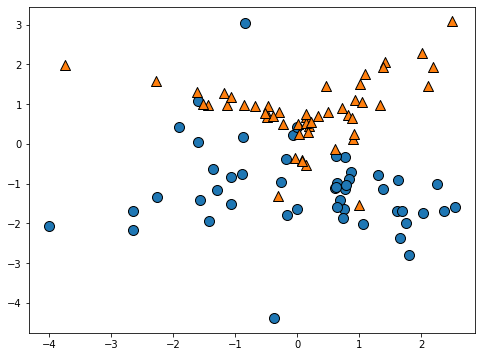

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


seed = 195512
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           random_state=seed)

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], s=100,
            edgecolors="k")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], s=100,
            edgecolors="k", marker="^")
plt.show()

### MLP Classifier in Scikit-learn

Scikit-learn has an `MLPClassifier` class which is a multi-layer perceptron for classification. We can use it just the same as any other models in scikit-learn. 

_We receives a `ConvergenceWarning` if we use it without specifying any parameters. This means that the neural network needs more iterations to converge on the optimal coefficients. The default value for the number of iterations is 200._

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
mlp = MLPClassifier(max_iter=1500)
mlp.fit(X_train, y_train)

print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.84


### Parameters for MLP Classifier

We can configure the number of hidden layers and how many nodes in each layer. By default, an instance of `MLPClassifier` has a single hidden layer of 100 nodes. This often works, but we can experiment with different values. For example, we can create one with two hidden layers, one of 100 nodes and one of 50 nodes.

In [6]:
mlp_two_layers = MLPClassifier(max_iter=1500, hidden_layer_sizes=(100, 50))
mlp_two_layers.fit(X_train, y_train)

print("accuracy:", mlp_two_layers.score(X_test, y_test))

accuracy: 0.8


The `max_iter` parameter is introduced in the last part. This is the maximum number of iterations. In general, the more data we have, the fewer iterations we need to converge. If the value is too large, it may take longer to run. If the value is too small, the model may not converge and raise an exception.

We also sometimes need to set parameter `alpha`, which is the step size. This is how much the neural network changes the coefficients at each iteration. If the value is too small, you may never converge on the optimal solution. if the value is too large, you may miss the optimal solution. Note that decreasing `alpha` usually requires an increase in `max_iter`.

Sometimes you will want to change the `solver`. This is what algorithm is used to find the optimal solution. All the solvers will work, but one solver may find the optimal solution faster for a particular dataset.

## Predicting Handwritten Digits

### The MNIST Dataset

In this section, we will be using the MNIST dataset of handwritten digits. NIST is the National Institute of Standards and Technology and the M stands for Modified. As the name suggests, it is a database of images of handwritten digits. We will build a MLP classifier to determine which digit is in the image.

We will start with the version of the MNIST dataset that is built into scikit-learn. This has images with only 8 by 8 pixels, so they are blurry. We first only import data of 0s and 1s for simplicity.

In [7]:
from sklearn.datasets import load_digits

X, y = load_digits(n_class=2, return_X_y=True)

print(f"{X.shape = }")
print(f"{y.shape = }")

print(f"{X[0] = }")
print(f"{y[0] = }")

X.shape = (360, 64)
y.shape = (360,)
X[0] = array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])
y[0] = 0


We see that we have 300 samples and 64 features. Each feature is one pixel in the image. The values is on a gray-scale where 0 is black and 16 is white.

To get a more intuitive view of the sample, we reshape it to 8 by 8.

In [8]:
X[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### Drawing the Digits

It is helpful to have a visual representation of the images. We use `matshow` of `matplotlib` to draw the image. The `cmap` parameter indicates that the image is in gray-scale rather than colored.

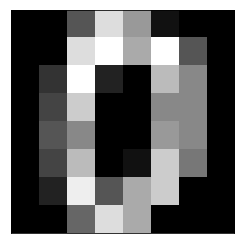

In [9]:
plt.matshow(X[0].reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

_You can see that with only 64 pixels the image is very pixelated. However, even with these blurry images we can build an excellent model._

### MLP for MNIST Dataset

Now let's start building the model with an MLP classifier.

In [10]:
%%capture

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
mlp = MLPClassifier(max_iter=1000, random_state=seed)
mlp.fit(X_train, y_train)

Let's look at how the model predicts the first sample in the test set and see the digit for ourselves.

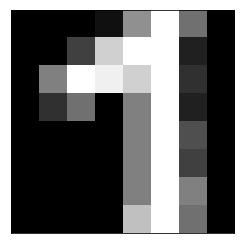

prediction: [1]


In [11]:
x_test_0 = X_test[0]
plt.matshow(x_test_0.reshape(8, 8), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

print("prediction:", mlp.predict(x_test_0.reshape(1, -1)))

This is clearly a 1 and our model gets the correct prediction.

We can also see the model's accuracy on the entire test set.

In [12]:
print("accuracy:", mlp.score(X_test, y_test))

accuracy: 1.0


The model gets all of them correct.

### Classifying All Digits

In the previous parts, our model only dealt with 0s and 1s, which are easily distinguishable. In this part we see that neural networks are easily generalized to handle multiple outputs. This time when we load the dataset, we do not limit the number of classes.

In [13]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)
mlp = MLPClassifier(random_state=seed)
mlp.fit(X_train, y_train)

print("accuracy:", mlp.score(X_test, y_test))

accuracy: 0.9644444444444444


So we got about $96\%$ of the data points in the test set correct. Let's take a closer look at the ones we got incorrect. We use a mask to pull out the data points we got incorrect and print them.

In [14]:
y_pred = mlp.predict(X_test)
incorrect_mask = y_pred != y_test
X_incorrect = X_test[incorrect_mask]
y_incorrect_true = y_test[incorrect_mask]
y_incorrect_pred = y_pred[incorrect_mask]

incorrect_mask.sum()

16

We got 16 predictions wrong. we can display them in a 4 by 4 grid. 

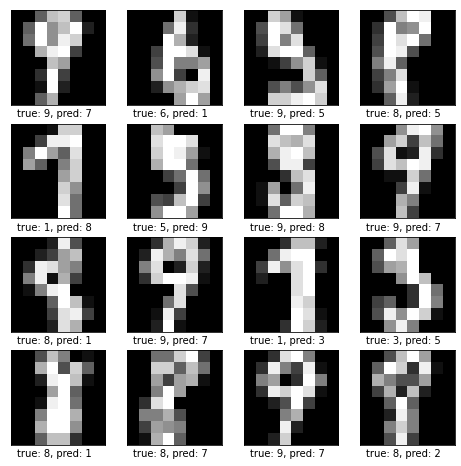

In [15]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    img = ax.matshow(X_incorrect[i].reshape(8, 8),
                     cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(0, 8.5,
            f"true: {y_incorrect_true[i]}, "
            f"pred: {y_incorrect_pred[i]}")
plt.show()

## Visualizing MLP Weights

### Open ML

[Open ML](www.openml.org) has a database of large datasets that can be used for a variety of machine learning problems. Scikit-learn has a function `fetch_openml` for downloading datasets directly from the Open ML database.

For this section, we will use their more granular version of the MNIST dataset from Open ML. Each image has $28 \times 28 = 784$ pixels.

In [16]:
from sklearn.datasets import fetch_openml


X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [17]:
print(f"{X.shape = }",
      f"{y.shape = }",
      f"{X.min() = }",
      f"{X.max() = }",
      f"{type(y[0]) = }",
      sep="\n")

X.shape = (70000, 784)
y.shape = (70000,)
X.min() = 0.0
X.max() = 255.0
type(y[0]) = <class 'str'>


We can see that we now have 70,000 samples with 784 features. The feature values range from 0 to 255 (which we still interpret on a gray scale). the target values are the numbers 0-9. Note that the target values are stored as Python `str` objects.

Our goal is to visualize the weights of the hidden layer, so we need to reduce the complexity of our dataset and model. We will be using only data of digits 0-3.

In [18]:
le3_mask = y <= "3"
X_le3 = X[le3_mask]
y_le3 = y[le3_mask]

Our MLP classifier will only have 6 nodes in the hidden layer and we will use `"sdg"` (stochastic gradient descent) as our solver.

In [19]:
%%capture

mlp = MLPClassifier(hidden_layer_sizes=(6, ),
                    solver="sgd",
                    random_state=seed)

mlp.fit(X_le3, y_le3)

The model converges.

### MLP Classifier Coefficients

An `MLPClassifier` object also has the `coefs_` attribute. Let's see what it's like.

In [20]:
print(f"{type(mlp.coefs_) = }")
print(f"{len(mlp.coefs_) = }")

type(mlp.coefs_) = <class 'list'>
len(mlp.coefs_) = 2


We see that it is a Python `list` object with 2 elements. The two elements correspond to the two layers: the hidden layer and the output layer. Let's look at the shape of the coefficients for the hidden layer.

In [21]:
print(f"{mlp.coefs_[0].shape = }")

mlp.coefs_[0].shape = (784, 6)


We see that we have a 2-dimensional array of size $784 \times 6$. There are 6 nodes in the hidden layer and 784 inputs feeding into each node, and we have a weight for each of these connections.

In order to interpret the values, we will need to use a visual representation.

### Visualizing the Hidden Layer

We will use the `matshow` function from `matplotlib` again to draw the images.

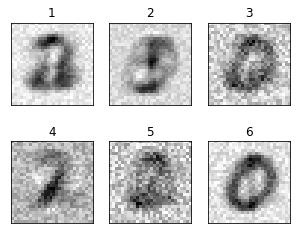

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(5, 4))
for i, ax in enumerate(axes.ravel()):
    coef = mlp.coefs_[0][:, i]
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i + 1)
plt.show()

You can see that they somewhat resemble parts of our target digits.

_If we change the random state of the classifier, we will likely get very different results. There are many equivalently optimal neural networks that work differently._

## Neural Network Pros and Cons

### Interpretability

Neural networks are not a good option for interpretability. While we can visualize the nodes in the hidden layer to understand on a high level what the neural network is doing, it is impossible to fully explain what each node is doing. This makes neural network a difficult model to interpret and use in certain business occasions.

### Computation

Neural networks can take decent amount of time to train. Each node has its own coefficients and needs to be iteratively updates. However, they are **parallelizable**, so it is possible to throw computer power at them to make them train faster.

Once the models are built, they are not slow to make predictions. However, they are not as fast as some of the other models.

### Performance

The main draw to neural networks is their performance. On many problems, their performance simply can not be beaten by other models. They can take some tuning to reach the optimal performance, but they benefit from needing minimal feature engineering prior to building the model.

A lot of simpler problems, you can achieve equivalent performance with a simpler model like logistic regression, but with large unstructured datasets, neural networks outperform other models.